In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("netflix1.csv")
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [ ]:
df.info()  # chekcing for incorrect dtype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


##Quality Issue :

    1  'date_added' has wrong data type (object)

    2  'duration has wrong data type (object)

In [ ]:
df1 = df.copy() # before cleaning creating copy of data frame

In [ ]:
# converting data type of 'data_added' from object to datetime

df1.date_added = pd.to_datetime ( df1.date_added )
df1.info()                 # checking if datatype is changed correctly

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   country       8790 non-null   object        
 5   date_added    8790 non-null   datetime64[ns]
 6   release_year  8790 non-null   int64         
 7   rating        8790 non-null   object        
 8   duration      8790 non-null   object        
 9   listed_in     8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 686.8+ KB


In [ ]:
df1.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
# checking for null values columns wise

df.isna().any()    #any() shows columns wise result in bool (True/False) if column contains duplicate vales'''

show_id         False
type            False
title           False
director        False
country         False
date_added      False
release_year    False
rating          False
duration        False
listed_in       False
dtype: bool

In [ ]:
# checking for duplicate values
print(df1.duplicated().value_counts())   # counting duplicate values if any
df1[df1.duplicated()]                     # accessing duplicates if any

False    8790
dtype: int64


,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in


In [ ]:
#checking for unique values in 'type' column
df1.type.unique()

array(['Movie', 'TV Show'], dtype=object)

In [ ]:
#Spliting dataset into two datasets on bases of 'type'

df_tv = df1[df1.type == 'TV Show']
df_movie = df1[df1.type == 'Movie']

In [ ]:
df_tv.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
5,s9,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV"
17,s4,TV Show,Jailbirds New Orleans,Not Given,Pakistan,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV"
18,s15,TV Show,Crime Stories: India Detectives,Not Given,Pakistan,2021-09-22,2021,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Docuseries"


In [ ]:
df_movie.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
6,s10,Movie,The Starling,Theodore Melfi,United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas"
7,s939,Movie,Motu Patlu in the Game of Zones,Suhas Kadav,India,2021-05-01,2019,TV-Y7,87 min,"Children & Family Movies, Comedies, Music & Mu..."


In [ ]:
temp_dur = df_tv.duration.str.split(' ',expand=True) # spliting duration
df_tv['duration_seasons'] = temp_dur[0]# putting splited data into tv dataset
df_tv.duration_seasons = pd.to_numeric(df_tv.duration_seasons) #converting data type to int

<ipython-input-28-29629c4bacc0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tv['duration_seasons'] = temp_dur[0]
<ipython-input-28-29629c4bacc0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tv.duration_seasons = pd.to_numeric(df_tv.duration_seasons) #converting data tyep to int


In [ ]:
df_tv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2664 entries, 1 to 8789
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   show_id           2664 non-null   object        
 1   type              2664 non-null   object        
 2   title             2664 non-null   object        
 3   director          2664 non-null   object        
 4   country           2664 non-null   object        
 5   date_added        2664 non-null   datetime64[ns]
 6   release_year      2664 non-null   int64         
 7   rating            2664 non-null   object        
 8   duration          2664 non-null   object        
 9   listed_in         2664 non-null   object        
 10  duration_seasons  2664 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 249.8+ KB


In [ ]:
df_tv.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,duration_seasons
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",1
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",1
5,s9,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",9
17,s4,TV Show,Jailbirds New Orleans,Not Given,Pakistan,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV",1
18,s15,TV Show,Crime Stories: India Detectives,Not Given,Pakistan,2021-09-22,2021,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Docuseries",1


In [ ]:
temp_dur = df_movie.duration.str.split(' ',expand=True) #spliting movie duration
df_movie['duration_minutes'] = temp_dur[0] # putting splited data into movie dataset
df_movie.duration_minutes = pd.to_numeric(df_movie.duration_minutes) # converting dataype to int from object

<ipython-input-33-76fc55372104>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movie['duration_minutes'] = temp_dur[0] # putting splited data into movie dataset
<ipython-input-33-76fc55372104>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movie.duration_minutes = pd.to_numeric(df_movie.duration_minutes) # converting dataype to int from object


In [ ]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6126 entries, 0 to 8783
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   show_id           6126 non-null   object        
 1   type              6126 non-null   object        
 2   title             6126 non-null   object        
 3   director          6126 non-null   object        
 4   country           6126 non-null   object        
 5   date_added        6126 non-null   datetime64[ns]
 6   release_year      6126 non-null   int64         
 7   rating            6126 non-null   object        
 8   duration          6126 non-null   object        
 9   listed_in         6126 non-null   object        
 10  duration_minutes  6126 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 574.3+ KB


##Storing Cleaned data

In [ ]:
df1.to_csv('Netflix_DF_cleaned.csv')
df_tv.to_csv('Netflix_TV_cleaned.csv')
df_movie.to_csv('Netflix_Movie_cleaned.csv')

## Visualization of data in below scenario

Text(0, 0.5, 'Number of Movies/TV Shows')

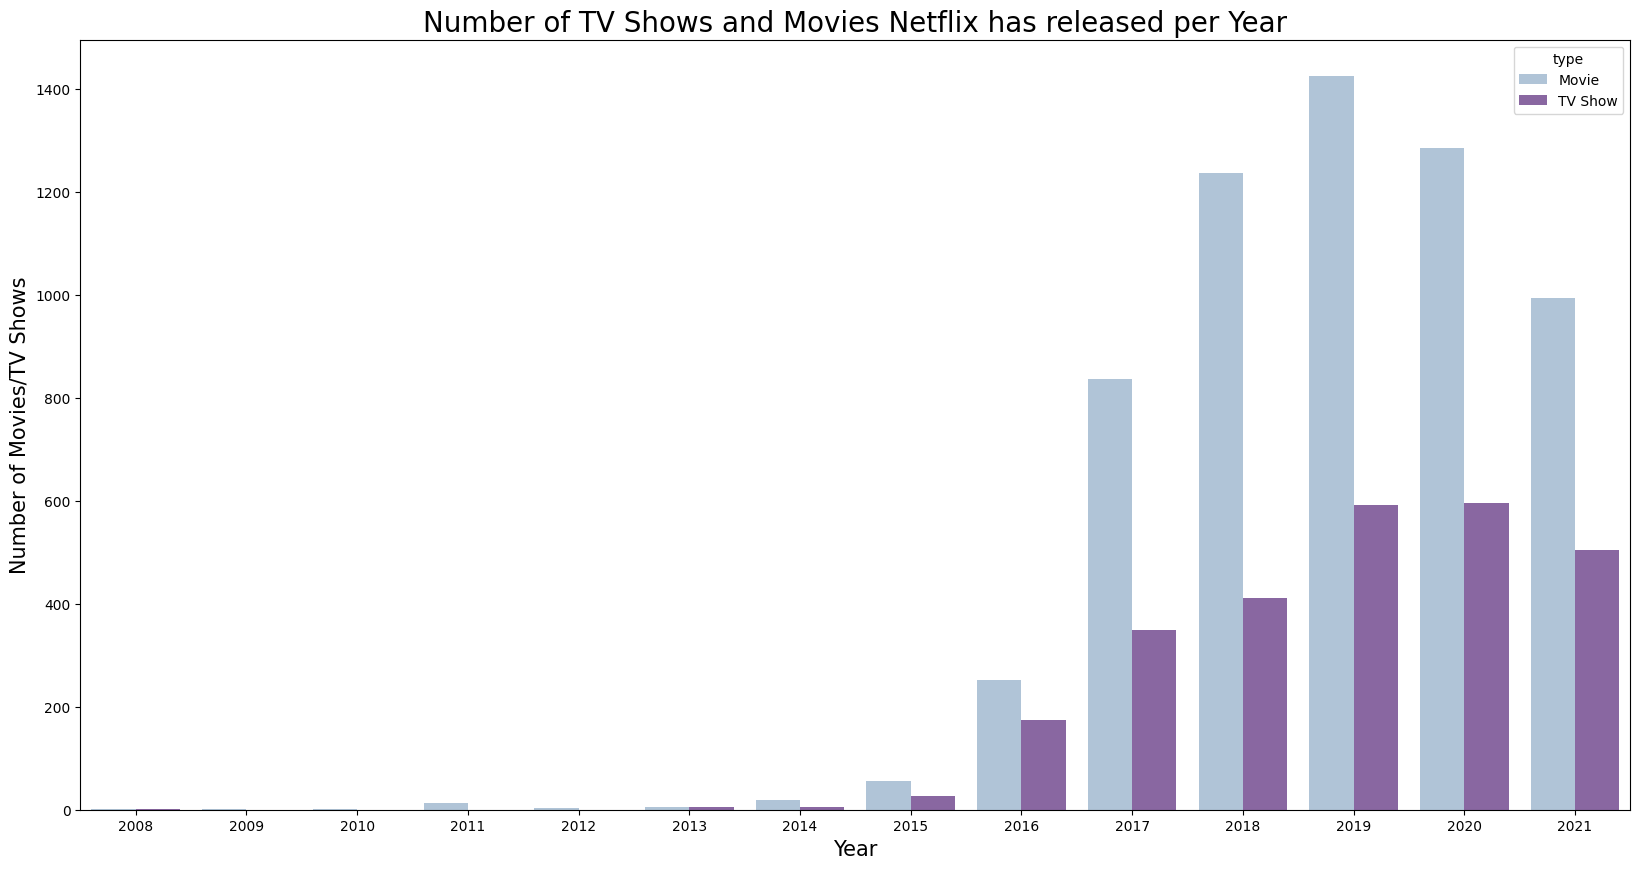

In [ ]:
#Number of TV Shows and Movies Netflix has released per Year

plt.figure(figsize=[20,10])
tv_movie = sns.countplot(x=df1.date_added.dt.year, data=df1, hue='type', palette = 'BuPu')
tv_movie.set_title("Number of TV Shows and Movies Netflix has released per Year",fontsize = 20)
tv_movie.set_xlabel('Year',fontsize = 15)
tv_movie.set_ylabel('Number of Movies/TV Shows',fontsize = 15)

##Which country produced the most of Netflix's media?

Text(0, 0.5, 'Number of TV Shows')

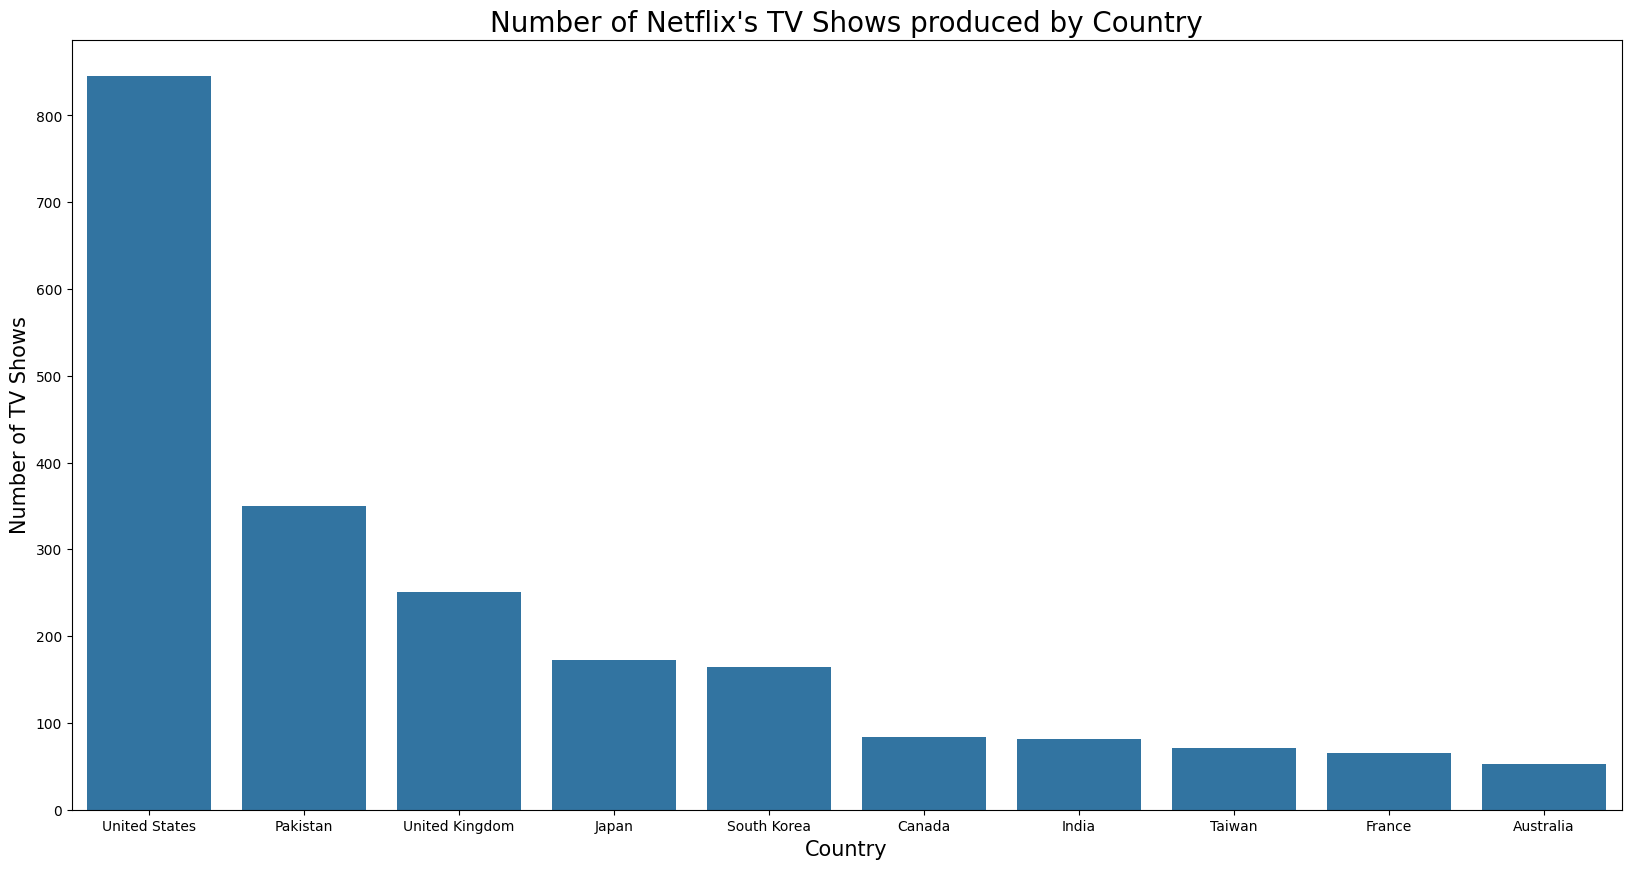

In [ ]:
sort_order = df_tv.groupby('country').count().sort_values(by = 'show_id',ascending=False)[0:10].index
base_color = base_color = sns.color_palette()[0]
tvc=pd
plt.figure(figsize=[20,10])
tv_c = sns.countplot(x='country',data=df_tv,order=sort_order)
tv_c.set_title("Number of Netflix's TV Shows produced by Country",fontsize = 20)
tv_c.set_xlabel('Country',fontsize = 15)
tv_c.set_ylabel('Number of TV Shows',fontsize = 15)


In [1]:
sd= df_tv.count().sort_values(by = 'show_id',ascending=False)
sd

NameError: name 'df_tv' is not defined